## Лабораторная №3 "Регрессионный анализ данных"
### Выполнил вариант № 8 студент группы 18-ИВТ-3 Модин Артем

##### Цель лабораторной работы  – получение навыков работы с методами регрессии 
- Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт). 
- Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции; 
- Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию); 
- Выполните замену категориальных признаков; выберите и обоснуйте способ замены; 
- Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других; 
- Заполните пропущенные значения в данных; 
- Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.  
 
Кодировка классификаторов: 
- 1 – линейная регрессия без использования регуляризаторов; 
- 2 – линейная регрессия, LASSO регуляризатор; 
- 3 – линейная регрессия, RIDGE регуляризатор; 
Набор данных 2
Классификаторы 2,3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import pearsonr, spearmanr
import sklearn as skl
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#for last task
l = Lasso()
r = Ridge()

In [2]:
car = pd.read_csv('autos.csv', encoding='iso-8859-1')
car_d = pd.DataFrame(car)
car_d

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


### Задание №1
Изучить набор данных. Создать описание набора данных на русском языке. 
Описать признаки, используемые в наборе данных (включить полученные описания в отчёт). 

- Первый стоблец - дата проверки
- Второй столбец - марка и модель а/м
- Третий столбец - продавец а/м
- Четвертый столбец - тип предложения
- Пятый стоблец - цена а/м
- Шестой столбец - 
- Седьмой столбец - вид/тип кузова а/м
- Восьмой столбец - год регистрации а/м
- Девятый столбец - коробка передач
- Десятый столбец - мощность двигателя а/м
- Одинадцатый столбец - модель а/м
- Двенадцатый столбец - пробег у а/м
- Тринадцатый столбец - месяц регистрации а/м
- Четырнадцатый столбец - вид бензина для заправки а/м
- Пятнадцатый столбец - марка
- Шестнадцатый столбец - наличие повреждений
- Семнадцатый столбец - дата выхода обьявления
- Восемнадцатый столбец - кол-во фотографий а/м в обьявлении
- Девятнадцатый столбец - почтовый индекс
- Двадцатый столбец - последняя проверка

### Задание №2
Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [3]:
print("Кол-во строк и столбцов до выполнения задания №2",car_d.shape)

Кол-во строк и столбцов до выполнения задания №2 (371528, 20)


In [4]:
car_d.drop_duplicates(inplace=True)
car_d.dropna(inplace=True)
car_d.drop(
    ['dateCrawled', 'offerType', 'dateCreated', 'postalCode', 'lastSeen', 'name', 'model','nrOfPictures'],
    axis = 1,
    inplace=True
)

print("После выпопления удаления дубликатов строк в наборе данных", car_d.shape)

После выпопления удаления дубликатов строк в наборе данных (260952, 12)


In [5]:
print("Найдены и удалены ", 371528-260952,end= " дубликат(ы/ов)")

Найдены и удалены  110576 дубликат(ы/ов)

### Задание №3
Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию).

In [6]:
n2 = [i for i in car_d.columns if car_d[i].dtype.name != 'object']
print("Numerical: " + str(n2))


Numerical: ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration']


До масштабирования


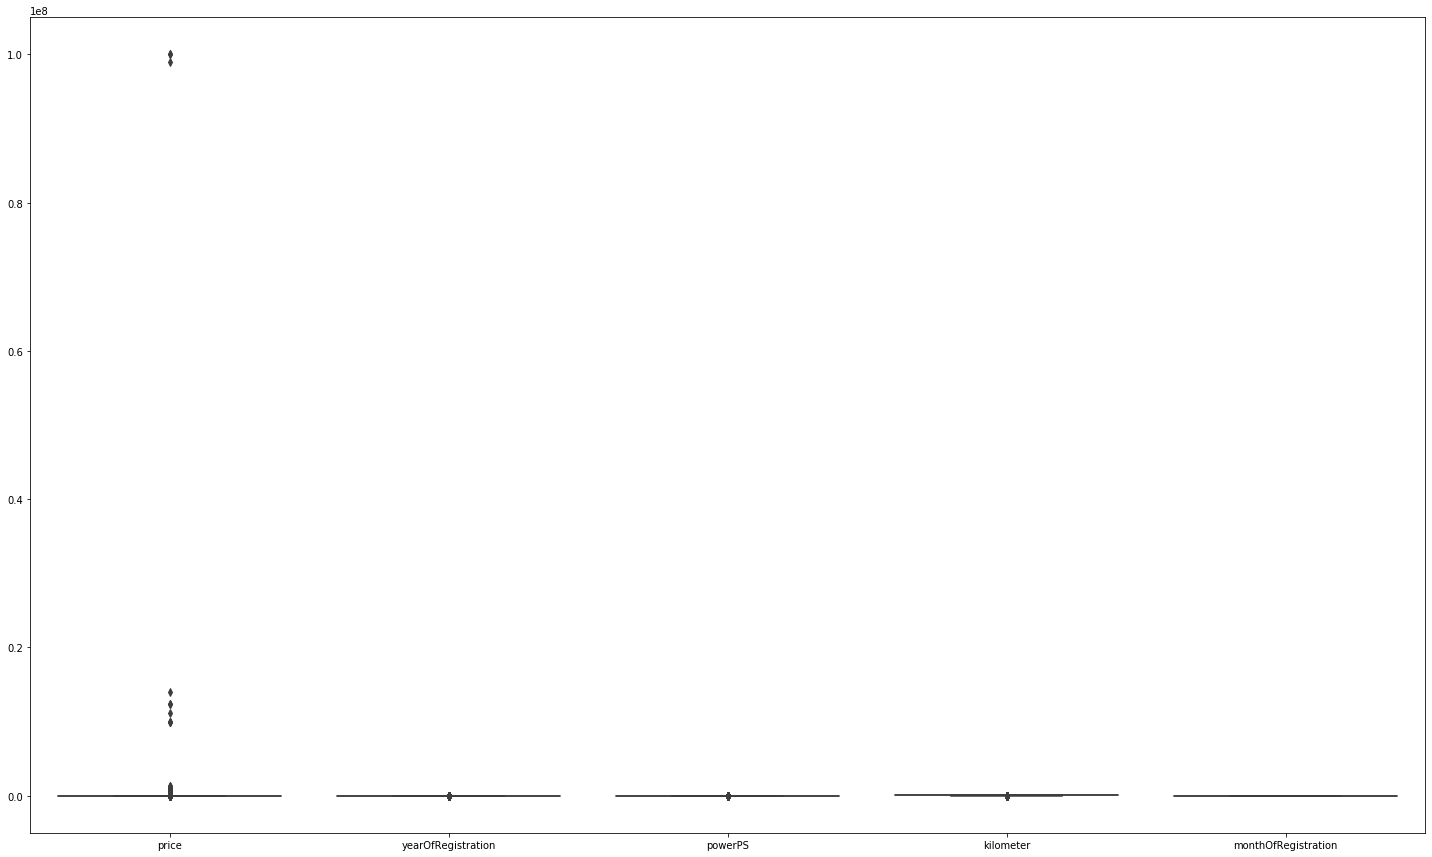

In [7]:
figuresize=(25,15)
plt.figure(figsize=figuresize)
sns.boxplot(data=car_d[n2])
print("До масштабирования")

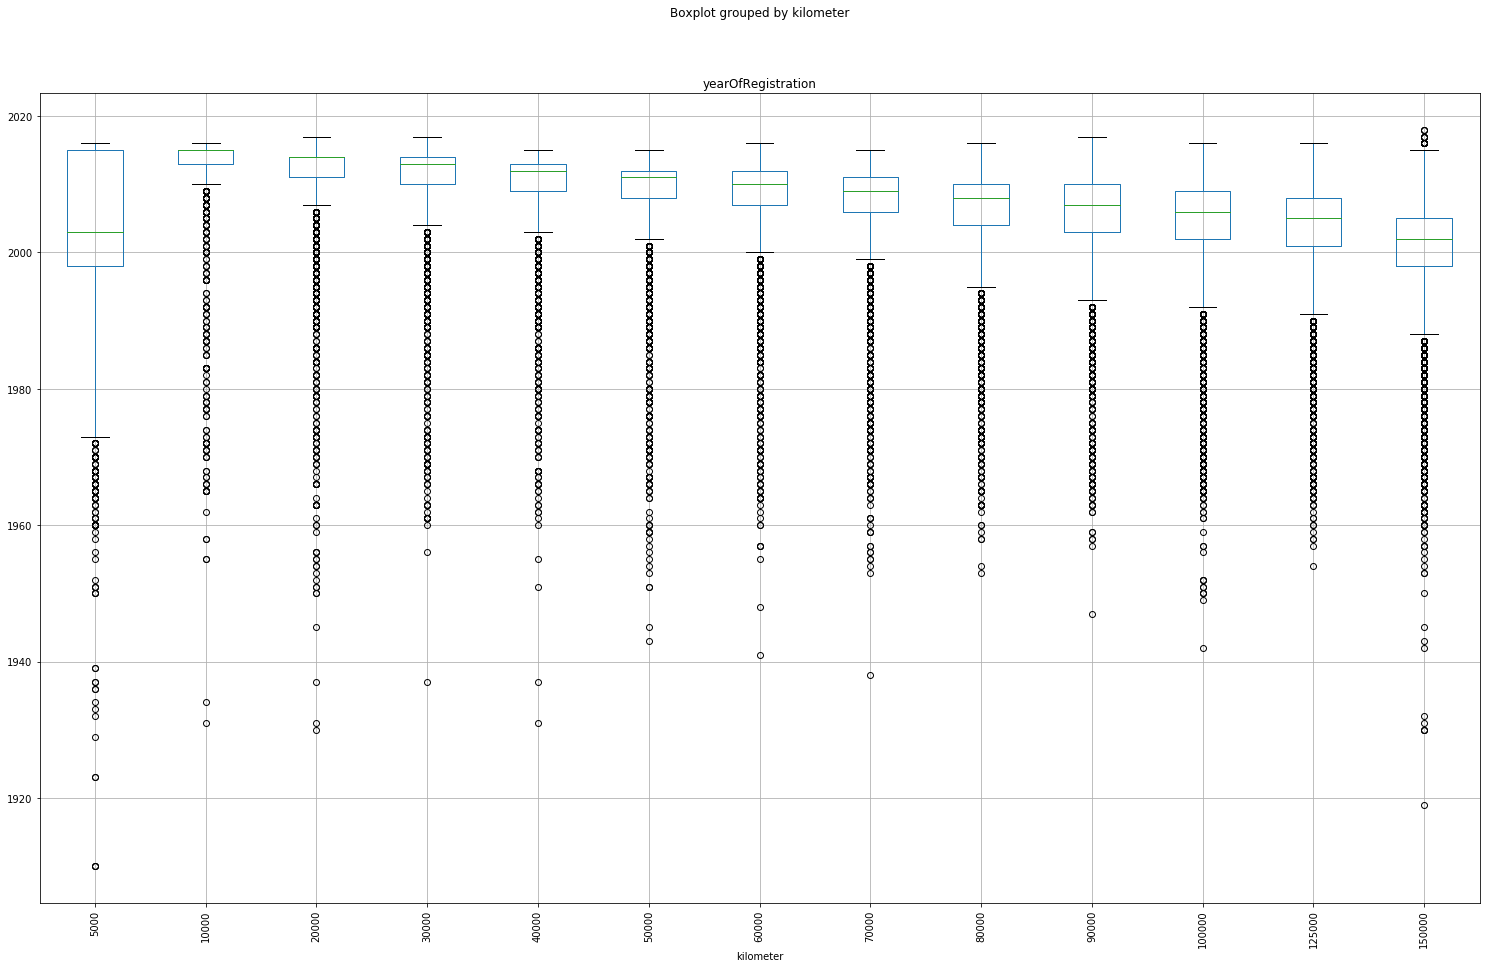

In [8]:
car_d.boxplot(column='yearOfRegistration', by='kilometer', rot=90, figsize=figuresize)
plt.show()

In [9]:
sc = MinMaxScaler()
car_d[n2] = sc.fit_transform(car_d[n2])
car_d.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,260952.000000,260952.000000,260952.000000,260952.000000,260952.000000
mean,0.000082,0.863977,0.006317,0.821096,0.515214
std,0.003433,0.060298,0.007264,0.274813,0.289281
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000015,0.824074,0.003900,0.655172,0.250000
50%,0.000039,0.870370,0.005800,1.000000,0.500000
75%,0.000086,0.907407,0.007500,1.000000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000


После масштабирования


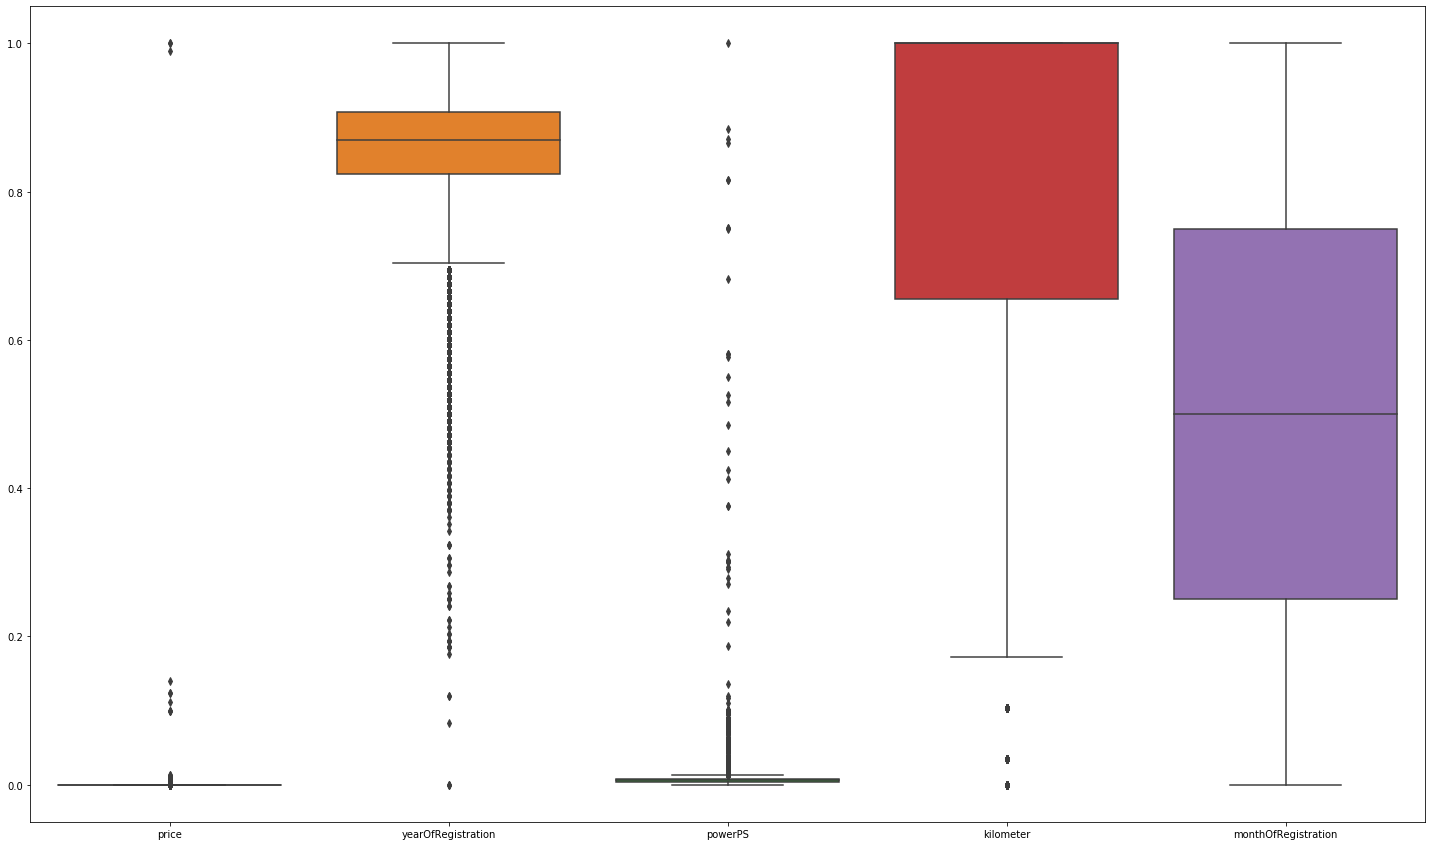

In [10]:
plt.figure(figsize=figuresize)
xc =sns.boxplot(data=car_d[n2])
print("После масштабирования")
xc

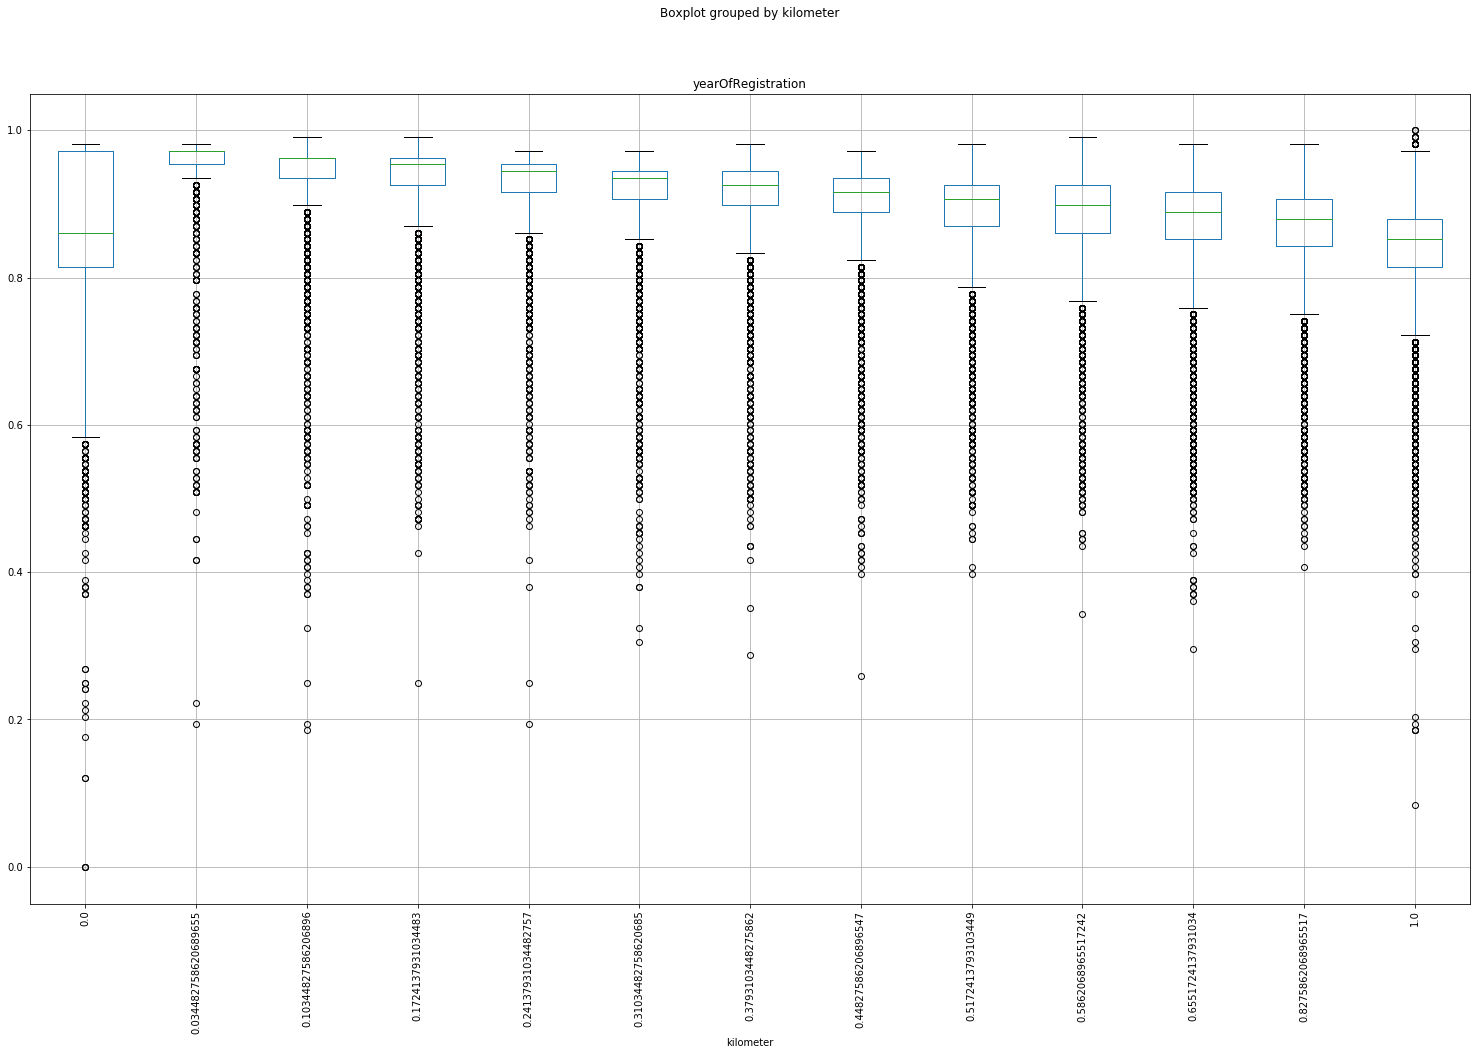

In [11]:
car_d.boxplot(column='yearOfRegistration', by='kilometer', rot=90, figsize=figuresize)
plt.show()

### Задание №4
Выполните замену категориальных признаков; выберите и обоснуйте способ замены.

In [12]:
categorC = [i for i in car_d.columns if car_d[i].dtype.name == 'object']
print("Categorical: " + str(categorC))

Categorical: ['seller', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']


In [13]:
nbin = [column for column in categorC if len(car_d[column].unique()) > 2]

for column in [column for column in categorC if len(car_d[column].unique()) == 2]:
    for i, unic_item in enumerate(car_d[column].unique()):
        car_d[column] = car_d[column].replace(to_replace=[unic_item], value=[i])

car_dnbin = pd.get_dummies(car_d[nbin])
car_d.drop(nbin, axis=1, inplace=True)
car_d = pd.concat([car_dnbin, car_d] , axis=1)
car_d

,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,...,brand_volvo,seller,price,abtest,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,notRepairedDamage
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0.000015,0,0.842593,0,0.00375,1.000000,0.500000,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0.000036,0,0.907407,0,0.00345,0.586207,0.583333,0
5,0,0,0,0,0,0,1,0,0,1,...,0,0,0.000007,0,0.787037,0,0.00510,1.000000,0.833333,1
6,0,0,1,0,0,0,0,0,0,1,...,0,0,0.000022,0,0.870370,0,0.00545,1.000000,0.666667,0
7,0,0,0,0,0,0,1,0,0,1,...,0,0,0.000000,0,0.648148,0,0.00250,0.241379,0.583333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,0,0,0,0,0,0,1,0,0,1,...,0,0,0.000032,1,0.870370,0,0.01125,1.000000,0.416667,1
371521,0,1,0,0,0,0,0,0,0,1,...,0,0,0.000012,1,0.833333,0,0.00000,1.000000,0.250000,0
371524,0,0,1,0,0,0,0,0,0,1,...,0,0,0.000012,0,0.833333,1,0.00505,0.827586,0.250000,0
371525,0,1,0,0,0,0,0,0,0,0,...,0,0,0.000092,0,0.796296,0,0.00510,1.000000,0.250000,0


##### Бесчисленные значения были заменены на численные начиная от нуля. Численные значения(старые) были преобразованы в новые.

### Задание №5
Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других.

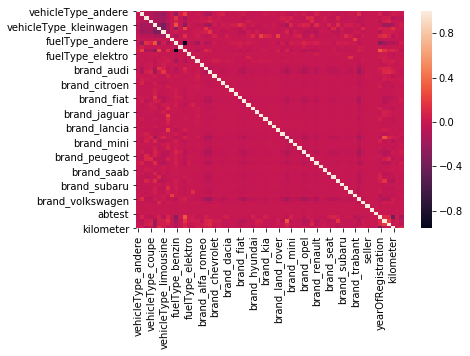

In [14]:
car_d_corr = car_d.corr()
sns.heatmap(car_d_corr)

### Задание №6
Заполните пропущенные значения в данных.

In [15]:
car_d.isnull().sum()

vehicleType_andere        0
vehicleType_bus           0
vehicleType_cabrio        0
vehicleType_coupe         0
vehicleType_kleinwagen    0
                         ..
gearbox                   0
powerPS                   0
kilometer                 0
monthOfRegistration       0
notRepairedDamage         0
Length: 63, dtype: int64

In [16]:
print("Пропущенных значений в данных нет")

Пропущенных значений в данных нет


### Задание №7
Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.  

In [17]:
dX, dY = car_d.drop(['price'], axis=1), car_d['price']
tr_x, t_x, tr_y, t_y = train_test_split(dX, dY, test_size = 0.3, random_state = 123)

#### Линейная регрессия, LASSO регуляризатор


In [18]:
params = {'alpha': np.arange(0, 0.1, 0.01)}
l_grid = GridSearchCV(l, params)
l_grid.fit(tr_x, tr_y)
best_a = l_grid.best_estimator_.alpha
print('Лучшее знач Альфа:', best_a, end="\n ")

l = Lasso(alpha=best_a)
l.fit(tr_x,tr_y)
pred_l = l.predict(t_x)
print(pred_l[:15] - t_y[:15])

Pirson, p_value_pirs = pearsonr(pred_l, t_y)
Spirman, p_value_speer = spearmanr(pred_l, t_y)
print("\nКорреляция Пирсона: ", Pirson)
print("Корреляция Спирмена: ", Spirman)
print("p-value Пирсон:", p_value_pirs)
print("p-value Спирмен:", p_value_speer)

Лучшее знач Альфа: 0.0
 173420   -0.000008
182741   -0.000100
271616   -0.000042
218173    0.000011
361460   -0.000031
45771    -0.000034
297004    0.000044
58119    -0.000008
304305    0.000054
183986   -0.000010
274833    0.000051
346765   -0.000058
237316   -0.000016
107975   -0.000007
241922   -0.000035
Name: price, dtype: float64

Корреляция Пирсона:  0.01485867631366872
Корреляция Спирмена:  0.6746671509751235
p-value Пирсон: 3.2165555254825227e-05
p-value Спирмен: 0.0


#### Линейная регрессия, RIDGE регуляризатор

In [19]:
params = {'alpha': np.arange(0, 3, 0.05)}
r_grid = GridSearchCV(r, params)
r_grid.fit(tr_x, tr_y)
best_a = r_grid.best_estimator_.alpha
print('Лучшее знач Альфа:', best_a, end="\n ")

r = Ridge(alpha=best_a)
r.fit(tr_x,tr_y)
pred_r = r.predict(t_x)
print(pred_r[:15] - t_y[:15])

Pirson, p_value_pirs = pearsonr(pred_r, t_y)
Spirman, p_value_speer = spearmanr(pred_r, t_y)
print("\nКорреляция Пирсона: ", Pirson)
print("Корреляция Спирмена: ", Spirman)
print("p-value Пирсон:", p_value_pirs)
print("p-value Спирмен:", p_value_speer)

Лучшее знач Альфа: 0.2
 173420   -0.000008
182741   -0.000100
271616   -0.000042
218173    0.000011
361460   -0.000031
45771    -0.000034
297004    0.000044
58119    -0.000008
304305    0.000055
183986   -0.000010
274833    0.000051
346765   -0.000058
237316   -0.000016
107975   -0.000007
241922   -0.000035
Name: price, dtype: float64

Корреляция Пирсона:  0.014861507406873612
Корреляция Спирмена:  0.6744601887769776
p-value Пирсон: 3.205422377244493e-05
p-value Спирмен: 0.0
